# GWs from bosons around black holes

In [14]:
import numpy as np
from gwaxion import physics
from matplotlib import pyplot as plt

Let's create a black-hole--boson system starting from a given BH mass (50 MSUN), initial dimensionless BH spin (0.9) and a fine structure constant (alpha = 0.2)

In [3]:
bhb = physics.BlackHoleBoson.from_parameters(m_bh=50, alpha=0.2, chi_bh=0.9)

Print some properties of the system

In [5]:
print "BLACK HOLE:"
print "----------"
print "The initial black-hole has a mass of %.1f MSUN (%.1e kg)."\
      % (bhb.bh.mass_msun, bhb.bh.mass)
print "It also has a dimensionless spin of chi=%.2f, which corresponds to an "\
      "angular momentum J=%.1e Js, and Kerr parameter a=%.1e m."\
      % (bhb.bh.chi, bhb.bh.angular_momentum, bhb.bh.a)
print "The outer radius is %.1e m, with a horizon angular frequency of %.1f rad/s."\
      % (bhb.bh.rp, bhb.bh.omega_horizon)

print "\nBOSON:"
print "-----"
print "The boson has a rest-mass of %1.e kg, which corresponds to an energy of "\
      "%.1e eV. Its spin is %i."\
      % (bhb.boson.mass, bhb.boson.energy_ev, bhb.boson.spin)

print "\nJOINT SYSTEM:"
print "------------"
print "The black-hole--boson system has a fine-structure constant of %.2f.\n" \
      % bhb.alpha

BLACK HOLE:
----------
The initial black-hole has a mass of 50.0 MSUN (9.9e+31 kg).
It also has a dimensionless spin of chi=0.90, which corresponds to an angular momentum J=2.0e+45 Js, and Kerr parameter a=6.6e+04 m.
The outer radius is 1.1e+05 m, with a horizon angular frequency of 1272.5 rad/s.

BOSON:
-----
The boson has a rest-mass of 1e-48 kg, which corresponds to an energy of 5.3e-13 eV. Its spin is 0.

JOINT SYSTEM:
------------
The black-hole--boson system has a fine-structure constant of 0.20.



Let's compute the growth rate for a bunch of energy levels with quantum numbers `(l, m, nr)`

In [6]:
print "The superradiant growth rates of some of its energy levels are:"
print "(l, m, nr, rate in Hz)"
for l in range(0, 3):
    for m in range(0, l+1):
        for nr in range(0, 3):
            print "(%i, %i, %i, %.1e)" % (l, m, nr, bhb.level_omega_im(l, m, nr))

The superradiant growth rates of some of its energy levels are:
(l, m, nr, rate in Hz)
(0, 0, 0, -1.5e+03)
(0, 0, 1, -1.9e+02)
(0, 0, 2, -5.5e+01)
(1, 0, 0, -1.6e+01)
(1, 0, 1, -5.7e+00)
(1, 0, 2, -2.5e+00)
(1, 1, 0, 5.2e+00)
(1, 1, 1, 1.8e+00)
(1, 1, 2, 8.2e-01)
(2, 0, 0, -5.7e-03)
(2, 0, 1, -3.4e-03)
(2, 0, 2, -2.0e-03)
(2, 1, 0, 1.5e-03)
(2, 1, 1, 8.8e-04)
(2, 1, 2, 5.2e-04)
(2, 2, 0, 8.3e-02)
(2, 2, 1, 5.0e-02)
(2, 2, 2, 2.9e-02)


Let's check whether the `m=1` mode is superradiant:

In [7]:
bhb.is_superradiant(1)

True

We can also directly ask for the fastest growing level:

In [8]:
bhb.max_growth_rate()

(1, 1, 0, 5.219376943743986)

In [10]:
# Let's now add a cloud to populate this level
# in this case, this equivalent to `bhb.cloud(1, 1, 0)`
print "\nCLOUDS:"
print "------"
cloud = bhb.best_cloud()
# The cloud is now stored in the BlackHoleBoson object
print "The system now has one cloud:"
print bhb.clouds


CLOUDS:
------
The system now has one cloud:
{(1, 1, 0): <gwaxion.physics.BosonCloud object at 0x10c4b7090>}


In [11]:
# Print some cloud properties
mass_fraction = cloud.mass / cloud.bhb_initial.bh.mass
print "\nAfter superradiant growth, the cloud has mass %.1f MSUN (%.1e kg)."\
      % (cloud.mass_msun, cloud.mass)
print "This is %.1f%%  of the original BH mass." % (mass_fraction*100)

# Note that the cloud object contains a pointer to the original BlackHoleBoson
# system under `cloud.bhb_initial`. It also has a similar object for the black
# hole that remains after superradiant growth:
print "The mass and spin of the final black hole are: (%.1f MSUN, %.2f)"\
      % (cloud.bhb_final.bh.mass_msun, cloud.bhb_final.bh.chi)


After superradiant growth, the cloud has mass 2.1 MSUN (4.2e+30 kg).
This is 4.2%  of the original BH mass.
The mass and spin of the final black hole are: (47.9 MSUN, 0.69)


In [12]:
print "\nGRAVITATIONAL WAVES:"
print "----------------"
print "The cloud will produce GWs at %.2f Hz" % cloud.fgw

# Create a waveform and plot it
hp, hc = cloud.waveform
inclination = np.pi/4
time = np.arange(0, 0.05, 1E-4)


GRAVITATIONAL WAVES:
----------------
The cloud will produce GWs at 257.21 Hz


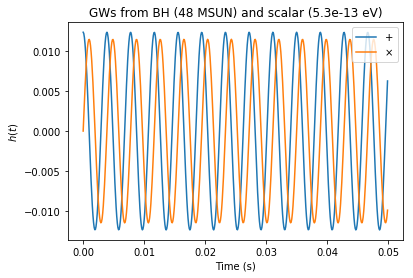

In [13]:
plt.plot(time, hp(inclination, time), label=r'$+$')
plt.plot(time, hc(inclination, time), label=r'$\times$')
plt.xlabel("Time (s)")
plt.ylabel(r"$h(t)$")
plt.title("GWs from BH (%.f MSUN) and scalar (%.1e eV)"
          % (cloud.bhb_final.bh.mass_msun, cloud.bhb_final.boson.energy_ev))
plt.legend(loc='upper right')
plt.show()